Data Cleaning and Machine Learning Algorithms

# 获取数据子集

In [ ]:
import pandas as pd
import numpy as np

pd.set_option('display.width', 75)
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:,.2f}'.format

nls97 = pd.read_csv("data/nls97.csv")
nls97.set_index("personid", inplace=True)

# 选择高中记录列
democols = ['gender','birthyear','maritalstatus',
 'weeksworked16','wageincome','highestdegree']

nls97demo = nls97[democols]
nls97demo.index.name

# 使用切分法选择几行
nls97demo[1000:1004].T
nls97demo[1000:1004:2].T

# 使用 head() 和 Python 切片法选择前 3 行
nls97demo[:3].T
nls97demo.head(3).T

# 使用 tail() 和 Python 切片法选择最后 3 行
nls97demo[-3:].T
nls97demo.tail(3).T

# 使用 loc 和 iloc 选择几行
nls97demo.loc[[195884,195891,195970]].T
nls97demo.loc[195884:195970].T
nls97demo.iloc[[0,1,2]].T
nls97demo.iloc[0:3].T
nls97demo.iloc[-3:].T

# 有条件地选择多行
nls97.nightlyhrssleep.head()
lowsleepthreshold = nls97.nightlyhrssleep.quantile(0.33)
lowsleepthreshold
sleepcheckbool = nls97.nightlyhrssleep<=lowsleepthreshold
sleepcheckbool.head()
sleepcheckbool.index.equals(nls97.index)

lowsleep = nls97.loc[sleepcheckbool]
lowsleep.shape
lowsleep = nls97.loc[nls97.nightlyhrssleep<=lowsleepthreshold]
lowsleep.shape

# 根据多个条件选择行
lowsleep3pluschildren = \
  nls97.loc[(nls97.nightlyhrssleep<=lowsleepthreshold)
    & (nls97.childathome>=3)]
lowsleep3pluschildren.shape

# 根据多个条件选择行，同时选择列
lowsleep3pluschildren = \
  nls97.loc[(nls97.nightlyhrssleep<=lowsleepthreshold)
    & (nls97.childathome>=3),
    ['nightlyhrssleep','childathome']]
lowsleep3pluschildren.shape

# 分类计数

counts_categorical

In [ ]:
import pandas as pd
import numpy as np

pd.set_option('display.width', 53)
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:,.2f}'.format

nls97 = pd.read_csv("data/nls97.csv")
nls97.set_index("personid", inplace=True)

nls97abb = nls97.iloc[:,:20]
nls97abb.dtypes

# 显示婚姻状况的频率
nls97abb.maritalstatus.value_counts(dropna=False)
nls97abb.maritalstatus.isnull().sum()

# 按数值字母顺序排序
marstatcnt = nls97abb.maritalstatus.value_counts(dropna=False)
type(marstatcnt)
marstatcnt.index
marstatcnt.sort_index()

# 用百分比代替计数
nls97.maritalstatus.\
  value_counts(normalize=True, dropna=False).\
     sort_index()

# 将对象列转换为类别
catcols = nls97abb.select_dtypes(include=["object"]).columns
for col in nls97abb[catcols].columns:
  nls97abb[col] = nls97abb[col].astype('category')

nls97abb[catcols].dtypes

# 显示分类数据类型列的名称，并检查缺失的数量
nls97abb[catcols].isnull().sum()

# 对所有政府责任变量进行百分比计算
nls97abb.filter(like="gov").apply(pd.value_counts, normalize=True)

# 对已婚者的所有政府责任变量进行百分比计算
nls97abb.loc[nls97abb.maritalstatus=="Married"].\
  filter(like="gov").\
  apply(pd.value_counts, normalize=True)

nls97abb.loc[nls97abb.maritalstatus=="Married",
  ['govprovidejobs','govpricecontrols']].\
  apply(pd.value_counts, normalize=True)

# 创建一个完整的十二年级例
nls97abb.highestgradecompleted=nls97abb.highestgradecompleted.replace(95,np.nan)
nls97abb['highschoolgrad'] = \
  np.where(nls97abb.highestgradecompleted.isnull(),np.nan, \
  np.where(nls97abb.highestgradecompleted<12,0,1))
nls97abb.groupby(['highschoolgrad'], dropna=False) \
  ['highestgradecompleted'].agg(['min','max','size'])
nls97abb['highschoolgrad'] = \
  nls97abb['highschoolgrad'].astype('category')

# 为 gpamath 创建五分位数
nls97abb.highestgradecompleted.value_counts(dropna=False).sort_index()
nls97abb['highgradegroup'] = \
  pd.qcut(nls97abb['highestgradecompleted'], 
  q=6, labels=[1,2,3,4,5,6])
nls97abb.groupby(['highgradegroup'],observed=False)['highestgradecompleted'].\
  agg(['min','max','size'])
nls97abb['highgradegroup'] = \
  nls97abb['highgradegroup'].astype('category')

# 计算数据框中所有类别变量的频率和百分比
freqout = open('views/frequencies.txt', 'w') 
for col in nls97abb.\
  select_dtypes(include=["category"]):
    print(col, "----------------------",
      "frequencies",
    nls97abb[col].value_counts(dropna=False).sort_index(),
      "percentages",
    nls97abb[col].value_counts(normalize=True).\
      sort_index(),
    sep="\n\n", end="\n\n\n", file=freqout)

freqout.close()

/var/folders/3z/zm1dwk351qdbn4xv1hxgr8f40000gn/T/ipykernel_97432/1079961356.py:40: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  nls97abb.filter(like="gov").apply(pd.value_counts, normalize=True)
/var/folders/3z/zm1dwk351qdbn4xv1hxgr8f40000gn/T/ipykernel_97432/1079961356.py:40: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  nls97abb.filter(like="gov").apply(pd.value_counts, normalize=True)
/var/folders/3z/zm1dwk351qdbn4xv1hxgr8f40000gn/T/ipykernel_97432/1079961356.py:43: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  nls97abb.loc[nls97abb.maritalstatus=="Married"].\
/var/folders/3z/zm1dwk351qdbn4xv1hxgr8f40000gn/T/ipykernel_97432/1079961356.py:43: FutureWarning: pandas.value_counts is deprecated and will be removed in a futur

# 连续统计

stats_continuous

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, AFG to ZWE
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   lastdate             221 non-null    datetime64[ns]
 1   location             221 non-null    object        
 2   total_cases          192 non-null    float64       
 3   total_deaths         185 non-null    float64       
 4   total_cases_mill     192 non-null    float64       
 5   total_deaths_mill    185 non-null    float64       
 6   population           221 non-null    float64       
 7   population_density   206 non-null    float64       
 8   median_age           190 non-null    float64       
 9   gdp_per_capita       193 non-null    float64       
 10  aged_65_older        188 non-null    float64       
 11  total_tests_thous    13 non-null     float64       
 12  life_expectancy      217 non-null    float64       
 13  hospital_beds_thous  170 non-null    f

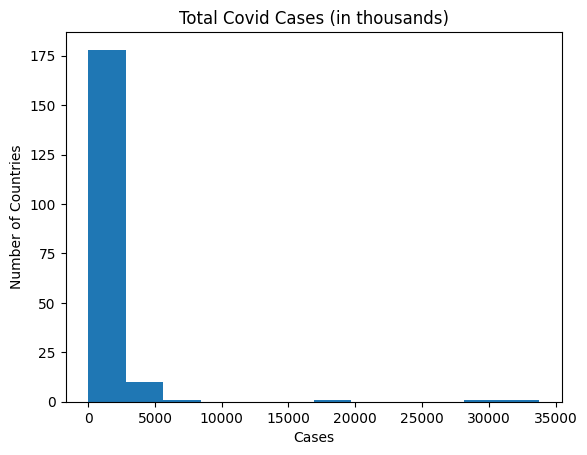

In [35]:
import pandas as pd
import numpy as np
import scipy.stats as scistat
import matplotlib.pyplot as plt

pd.set_option('display.width', 70)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:,.2f}'.format

covidtotals = pd.read_csv("data/covidtotals.csv",
  parse_dates=['lastdate'])
covidtotals.set_index("iso_code", inplace=True)

# 查看几行 covid 病例数据
covidtotals.shape
covidtotals.index.nunique()
covidtotals.sample(2, random_state=6).T
covidtotals.info()

# 获取累积值的描述性统计
keyvars = ['total_cases_mill','total_deaths_mill',
  'aged_65_older','diabetes_prevalence']
covidkeys = covidtotals[keyvars]
covidkeys.describe()
# 分位数
covidkeys.quantile(np.arange(0.0, 1.1, 0.1))

# 获取偏度和峰度
covidkeys.skew()
covidkeys.kurtosis()

# 进行正态性检验
for var in keyvars[1:]:
  stat, p = scistat.shapiro(covidkeys[var].dropna())
  print("feature=", var, "     p-value=", '{:.6f}'.format(p))

# 查看案件总数的分布情况
plt.hist(covidtotals['total_cases']/1000, bins=12)
plt.title("Total Covid Cases (in thousands)")
plt.xlabel('Cases')
plt.ylabel("Number of Countries")
plt.show()

# 直方图_箱形图

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.width', 53)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.0f}'.format
landtemps = pd.read_csv("data/landtemps2019avgs.csv")
covidtotals = pd.read_csv("data/covidtotals.csv", parse_dates=["lastdate"])
covidtotals.set_index("iso_code", inplace=True)

# 显示每百万例病例的直方图
plt.hist(covidtotals['total_cases_mill'], bins=7)
plt.axvline(covidtotals.total_cases_mill.mean(), color='red',
   linestyle='dashed', linewidth=1, label='mean')
plt.axvline(covidtotals.total_cases_mill.median(), color='black',
   linestyle='dashed', linewidth=1, label='median')
plt.title("Total Covid Cases")
plt.xlabel('Cases per Million')
plt.ylabel("Number of Countries")
plt.legend()
plt.show()

plt.hist(landtemps['avgtemp'])
plt.axvline(landtemps.avgtemp.mean(), color='red', linestyle='dashed', linewidth=1, label='mean')
plt.axvline(landtemps.avgtemp.median(), color='black', linestyle='dashed', linewidth=1, label='median')
plt.title("Average Land Temperatures")
plt.xlabel('Average Temperature')
plt.ylabel("Number of Weather Stations")
plt.legend()
plt.show()

landtemps.loc[landtemps.avgtemp<-25,['station','country','avgtemp']].\
  sort_values(['avgtemp'], ascending=True)

plt.boxplot(covidtotals.total_cases_mill.dropna(), labels=['Total Cases per Million'])
plt.annotate('extreme value threshold', xy=(1.05,157000), xytext=(1.15,157000), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('3rd quartile', xy=(1.08,64800), xytext=(1.15,64800), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('median', xy=(1.08,19500), xytext=(1.15,19500), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('1st quartile', xy=(1.08,2500), xytext=(1.15,2500), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.title("Boxplot of Total Cases")
plt.show()

plt.boxplot(landtemps.avgtemp.dropna(), labels=['Boxplot of Average Temperature'])
plt.title("Average Temperature")
plt.show()

fig = plt.figure()
fig.suptitle("Violin Plots of Covid Cases and Land Temperatures")
ax1 = plt.subplot(2,1,1)
ax1.set_xlabel("Cases per Million")
sns.violinplot(data=covidtotals.total_cases_mill, color="lightblue", orient="h")
ax1.set_yticklabels([])
ax2 = plt.subplot(2,1,2)
ax2.set_xlabel("Average Temperature")
sns.violinplot(data=landtemps.avgtemp, color="wheat",  orient="h")
ax2.set_yticklabels([])
plt.tight_layout()
plt.show()



# 离群值_单变量

outliers_univariate

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
pd.set_option('display.width', 70)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:,.1f}'.format
covidtotals = pd.read_csv("data/covidtotals.csv")
covidtotals.set_index("iso_code", inplace=True)

keyvars = ['location','total_cases_mill','total_deaths_mill',
  'aged_65_older','diabetes_prevalence','gdp_per_capita']

covidkeys = covidtotals[keyvars]

# 显示总病例的异常值
thirdq, firstq = covidkeys.total_cases_mill.quantile(0.75), covidkeys.total_cases_mill.quantile(0.25)
interquartilerange = 1.5*(thirdq-firstq)
extvalhigh, extvallow = interquartilerange+thirdq, firstq-interquartilerange
print(extvallow, extvalhigh, sep=" <--> ")
covidtotals.loc[covidtotals.total_cases_mill>extvalhigh].T
# covidtotals.mean()

covidkeys.info()

# 生成极值表并保存到 Excel 中
def getextremevalues(dfin):
  dfout = pd.DataFrame(columns=dfin.columns, data=None)
  for col in dfin.columns[1:]:
    thirdq, firstq = dfin[col].quantile(0.75),dfin[col].\
      quantile(0.25)
    interquartilerange = 1.5*(thirdq-firstq)
    extvalhigh, extvallow = \
      interquartilerange+thirdq, firstq-interquartilerange
    df = dfin.loc[(dfin[col]>extvalhigh) | (dfin[col]<extvallow)]
    df = df.assign(varname = col,
      threshlow = extvallow,
      threshhigh = extvalhigh)
    dfout = pd.concat([dfout, df])
  return dfout

extremevalues = getextremevalues(covidkeys)
extremevalues.varname.value_counts()
extremevalues.to_excel("views/extremevaluescases.xlsx")

# 再仔细观察一下每百万人死亡数的异常值
extremevalues.loc[extremevalues.varname=="total_deaths_mill",
  'threshhigh'][0]
extremevalues.loc[extremevalues.varname=="total_deaths_mill",\
  keyvars].sort_values(['total_deaths_mill'], ascending=False)

# 显示病例总数和每百万病例总数的 qqplot 图
sm.qqplot(covidtotals[['total_cases_mill']]. \
  sort_values(['total_cases_mill']).dropna(), line='s')
plt.title("QQ Plot of Total Cases Per Million")
plt.tight_layout()
plt.show()

# 加载陆地气温数据
landtemps = pd.read_csv("data/landtemps2019avgs.csv")
landtemps.avgtemp.describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])
landtemps.loc[landtemps.avgtemp<-25,'avgtemp'].count()
landtemps.avgtemp.skew()
landtemps.avgtemp.kurtosis()

# 显示陆地平均气温的 qqplot 图
sm.qqplot(landtemps.avgtemp.sort_values().dropna(), line='s')
plt.title("QQ Plot of Average Temperatures")
plt.tight_layout()
plt.show()

# 离群值_二变量

outliers_bivariate

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.width', 53)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:,.2f}'.format
covidtotals = pd.read_csv("data/covidtotals.csv")
covidtotals.set_index("iso_code", inplace=True)

# set up the cumulative and demographic columns
totvars = ['location','total_cases',
  'total_deaths','total_cases_pm',
  'total_deaths_pm']
demovars = ['population','pop_density',
  'median_age','gdp_per_capita',
   'hosp_beds']

# generate a correlation matrix of the cumulative and demographic data
covidtotals.corr(method="pearson")

# get descriptive statistics on the cumulative values
covidtotalsonly = covidtotals.loc[:, totvars]

# see if some countries have unexpected low or high death rates given number of cases
covidtotalsonly['total_cases_q'] = pd.\
  qcut(covidtotalsonly['total_cases'],
  labels=['very low','low','medium',
  'high','very high'], q=5, precision=0)
covidtotalsonly['total_deaths_q'] = pd.\
  qcut(covidtotalsonly['total_deaths'],
  labels=['very low','low','medium',
  'high','very high'], q=5, precision=0)

pd.crosstab(covidtotalsonly.total_cases_q,
  covidtotalsonly.total_deaths_q)

covidtotals.loc[(covidtotalsonly. \
  total_cases_q=="very high") & \
  (covidtotalsonly.total_deaths_q=="medium")].T
covidtotals.loc[(covidtotalsonly. \
  total_cases_q=="low") & \
  (covidtotalsonly.total_deaths_q=="high")].T
covidtotals.hosp_beds.mean()

# do a scatterplot of total_cases by total_deaths
ax = sns.regplot(x="total_cases", y="total_deaths", data=covidtotals)
ax.set(xlabel="Cases", ylabel="Deaths", title="Total Covid Cases and Deaths by Country")
plt.show()

covidtotals.loc[(covidtotals.total_cases<300000) \
  & (covidtotals.total_deaths>20000)].T
covidtotals.loc[(covidtotals.total_cases>300000) \
  & (covidtotals.total_deaths<10000)].T

# do a scatterplot of total_cases by total_deaths
ax = sns.regplot(x="total_cases_pm", y="total_deaths_pm", data=covidtotals)
ax.set(xlabel="Cases Per Million", ylabel="Deaths Per Million", title="Total Covid Cases per Million and Deaths per Million by Country")
plt.show()

covidtotals.loc[(covidtotals.total_cases_pm<7500) \
  & (covidtotals.total_deaths_pm>250),\
  ['location','total_cases_pm','total_deaths_pm']]
covidtotals.loc[(covidtotals.total_cases_pm>5000) \
  & (covidtotals.total_deaths_pm<=50), \
  ['location','total_cases_pm','total_deaths_pm']]


# 直方图_方框图

histograms_boxplots

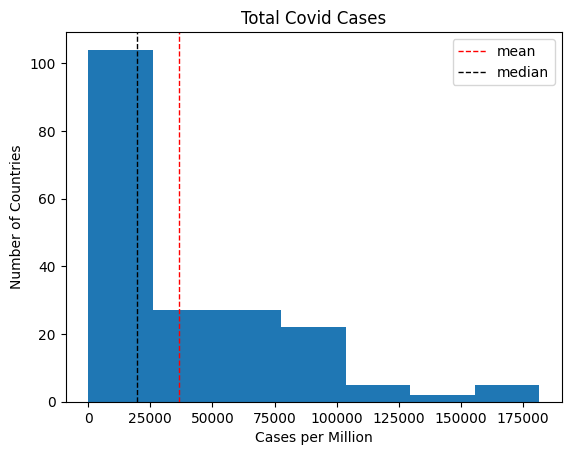

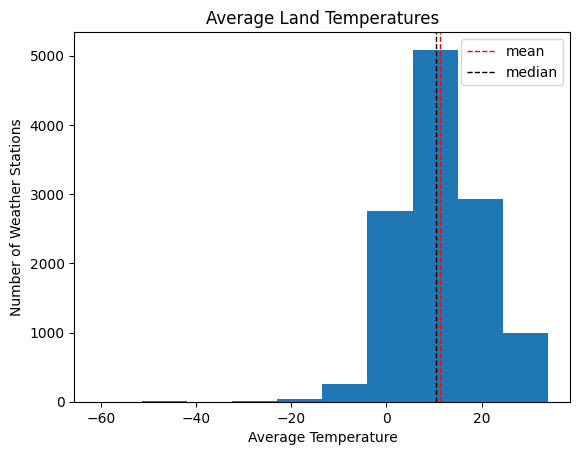

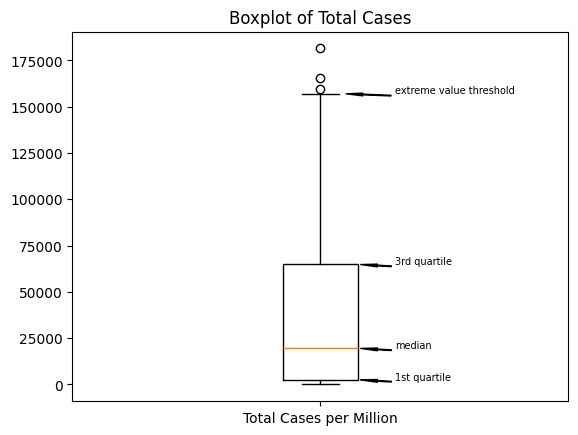

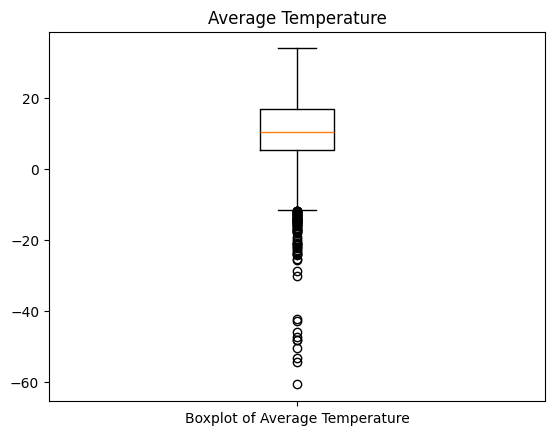

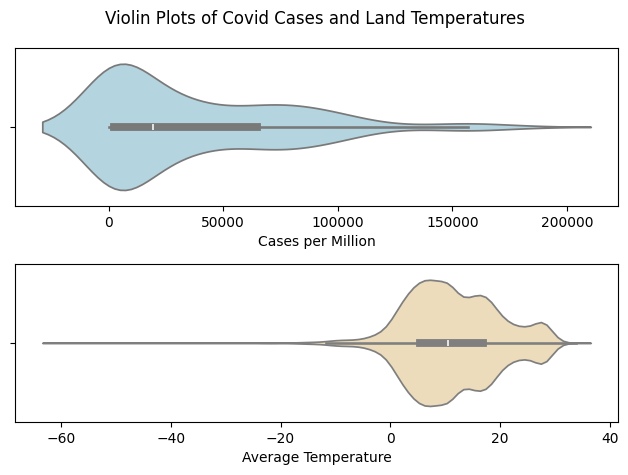

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.width', 53)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.0f}'.format
landtemps = pd.read_csv("data/landtemps2019avgs.csv")
covidtotals = pd.read_csv("data/covidtotals.csv", parse_dates=["lastdate"])
covidtotals.set_index("iso_code", inplace=True)

# 显示每百万病例的柱状图
plt.hist(covidtotals['total_cases_mill'], bins=7)
plt.axvline(covidtotals.total_cases_mill.mean(), color='red',
   linestyle='dashed', linewidth=1, label='mean')
plt.axvline(covidtotals.total_cases_mill.median(), color='black',
   linestyle='dashed', linewidth=1, label='median')
plt.title("Total Covid Cases")
plt.xlabel('Cases per Million')
plt.ylabel("Number of Countries")
plt.legend()
plt.show()

plt.hist(landtemps['avgtemp'])
plt.axvline(landtemps.avgtemp.mean(), color='red', linestyle='dashed', linewidth=1, label='mean')
plt.axvline(landtemps.avgtemp.median(), color='black', linestyle='dashed', linewidth=1, label='median')
plt.title("Average Land Temperatures")
plt.xlabel('Average Temperature')
plt.ylabel("Number of Weather Stations")
plt.legend()
plt.show()

landtemps.loc[landtemps.avgtemp<-25,['station','country','avgtemp']].\
  sort_values(['avgtemp'], ascending=True)

plt.boxplot(covidtotals.total_cases_mill.dropna(), tick_labels=['Total Cases per Million'])
plt.annotate('extreme value threshold', xy=(1.05,157000), xytext=(1.15,157000), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('3rd quartile', xy=(1.08,64800), xytext=(1.15,64800), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('median', xy=(1.08,19500), xytext=(1.15,19500), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('1st quartile', xy=(1.08,2500), xytext=(1.15,2500), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.title("Boxplot of Total Cases")
plt.show()

plt.boxplot(landtemps.avgtemp.dropna(), tick_labels=['Boxplot of Average Temperature'])
plt.title("Average Temperature")
plt.show()

fig = plt.figure()
fig.suptitle("Violin Plots of Covid Cases and Land Temperatures")
ax1 = plt.subplot(2,1,1)
ax1.set_xlabel("Cases per Million")
sns.violinplot(data=covidtotals.total_cases_mill, color="lightblue", orient="h")
ax1.set_yticklabels([])
ax2 = plt.subplot(2,1,2)
ax2.set_xlabel("Average Temperature")
sns.violinplot(data=landtemps.avgtemp, color="wheat",  orient="h")
ax2.set_yticklabels([])
plt.tight_layout()
plt.show()